In [1]:
# 分析训练数据和测试数据的差别

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TRAIN_DATA_FILE = "train_data.csv"
TEST_DATA_FILE = "test_data.csv"

training_set = tf.contrib.learn.datasets.base.load_csv_with_header(
    filename=TRAIN_DATA_FILE,
    target_dtype=np.int,
    features_dtype=np.float32,
    target_column=0
)
test_set = tf.contrib.learn.datasets.base.load_csv_with_header(
    filename=TEST_DATA_FILE,
    target_dtype=np.int,
    features_dtype=np.float32,
    target_column=0
)
# print(training_set)
X, y = training_set.data, training_set.target
print(X)
print(y)
X_test, y_test = test_set.data, test_set.target
print(X_test)
print(y_test)

[[  997.9039917    637.5949707    658.66802979 ..., -2203.02001953
  -1180.18994141   433.90600586]
 [  914.19799805   634.23999023   593.70501709 ..., -2250.         -1360.56005859
    524.07501221]
 [ 3800.81005859  1671.33996582  1206.88000488 ...,  2762.57006836
    150.93099976  3800.81005859]
 ..., 
 [ 5833.75976562  3465.73999023  1283.31994629 ...,  3759.70996094
   3267.16992188   388.3460083 ]
 [ 3079.31005859  2435.30004883  1444.40002441 ...,  1880.58996582
   1614.83996582  1518.97998047]
 [ 7352.56982422  6941.18994141  1667.86999512 ...,  5983.12988281
   1249.70996094  2424.22998047]]
[0 0 0 ..., 5 5 5]
[[ 2750.11010742  1361.89001465  -247.50799561 ...,   -81.54180145
   1146.26000977 -1566.48999023]
 [ 2646.25        1760.84997559   481.1000061  ...,   668.75        1519.73999023
   -568.97302246]
 [ 3509.62011719  3509.62011719  -241.32000732 ...,  1132.90002441
    594.059021    -993.65802002]
 ..., 
 [  987.46099854 -2364.60009766  -155.59199524 ..., -4259.29980469

In [8]:
# 看训练数据的类别分布

[205, 7431, 53, 1441, 446, 969]
[46, 78, 47, 53, 36, 40]


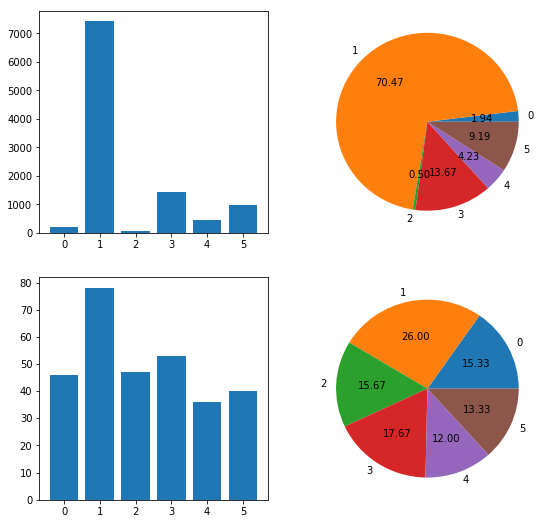

In [3]:
train_count = []
test_count = []
xs = []
for i in range(6):
    xs.append(i)
    train_count.append(list(y).count(i))
    test_count.append(list(y_test).count(i))
print(train_count)
print(test_count)

# 画图
plt.figure(1, figsize=(9, 9))
plt.subplot(221)
plt.bar(xs, train_count)
plt.subplot(222)
plt.pie(train_count, autopct='%.2f', labels=xs)
plt.subplot(223)
plt.bar(xs, test_count)
plt.subplot(224)
plt.pie(test_count, autopct='%.2f', labels=xs)
plt.show()


In [4]:
# 因为类别1所占比最大,所以如果有噪音数据,那么出现在1中是最有可能的.

In [29]:
# 从上图可以看出训练数据中类别1占的比例太大,而测试数据的类别比例却差不多,所以需要对训练数据进行筛选

# 下面我将尝试几种数据筛选方法

## 随机去除数据